# Исследование надежности заемщиков

## Получение данных

### Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Прочитаем файл и сохраним его в переменную `df`

In [2]:
df = pd.read_csv(r'C:\Users\HuaweiMatebook\jupyternotebooks\data.csv')

Первые 10 строк таблицы:

In [3]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Общая информация о данных таблицы:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
print(f'Количество пропусков в датафрейме: {df.isna().sum().sum()}')
print(f'Количество явных дубликатов в датафрейме: {df.duplicated().sum()}')

Количество пропусков в датафрейме: 4348
Количество явных дубликатов в датафрейме: 54


Общая гистограмма для всех числовых столбцов таблицы:

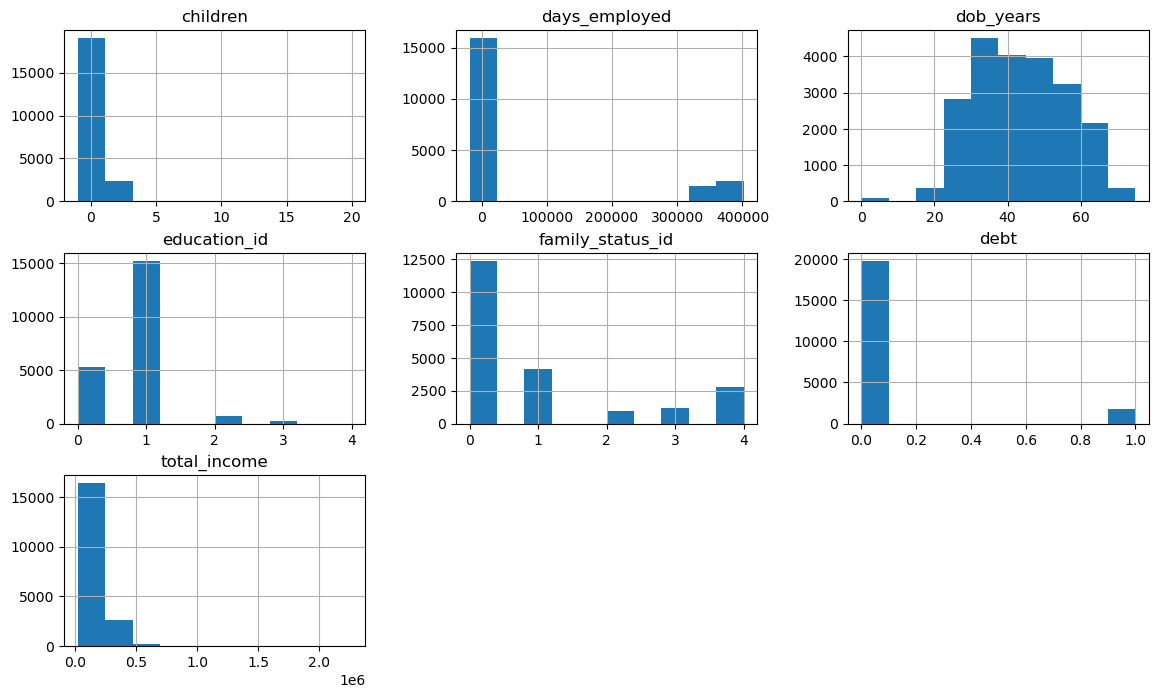

In [6]:
df.hist(figsize=(14,8))
plt.show()

**Вывод:** В таблице 12 столбцов и 21525 строк. В каждой строке - информация о клиенте банка.

Количество значений в столбцах различается. Это говорит о том, что в данных есть пропуски. Также в данных присутствуют явные дубликаты. В некоторых столбцах  установлен не соответствующий значениям тип данных. Из гистограммы сразу видно, что есть аномальные значения.

## Предобработка данных

### Удаление пропусков

In [7]:
# Выведем количество пропусков по столбцам
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В столбцах `days_employed` и `total_income` есть пропуски. На сумму дохода `total_income` сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`.

In [8]:
for t in df['income_type'].unique():
    df.loc[(df['income_type'] == t) & (df['total_income'].isna()), 'total_income'] = \
    df.loc[(df['income_type'] == t), 'total_income'].median()

Заполним пропуски в столбце `days_employed` медианными значениями по каждому типу занятости `income_type`

In [9]:
for t in df['income_type'].unique():
    df.loc[(df['income_type'] == t) & (df['days_employed'].isna()), 'days_employed'] = \
    df.loc[(df['income_type'] == t), 'days_employed'].median()

In [10]:
# Проверим, что пропусков больше нет
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Обработка аномальных значений

**`days_employed`**

К аномальному значению можем отнести отрицательное количество дней трудового стажа в столбце `days_employed`. Заменим все отрицательные значения положительными.

In [11]:
df['days_employed'] = df['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.

In [12]:
df.groupby('income_type')['days_employed'].agg('median').sort_values()

income_type
предприниматель       520.848083
студент               578.751554
компаньон            1547.382223
сотрудник            1574.202821
госслужащий          2689.368353
в декрете            3296.759962
пенсионер          365213.306266
безработный        366413.652744
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получились аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть.

**`children`**

Выведем перечень уникальных значений столбца `children`

In [13]:
df['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие значения.

In [14]:
df = df[(df['children'] != -1) & (df['children'] != 20)]

In [15]:
# Проверим, удалились ли эти аномалии
df['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный.

In [16]:
df['total_income'] = df['total_income'].astype(int)

### Обработка дубликатов

In [17]:
print('Количество явных дубликатов:', df.duplicated().sum())

Количество явных дубликатов: 54


In [18]:
# Удалим явные дубликаты
df = df.drop_duplicates()

Дубликаты могли появиться вследствие сбоя в записи данных. Стоит обратить внимание и разобраться с причинами их появления.

Выведем уникальные значения по каждому категориальному признаку:

In [19]:
for col in df.select_dtypes(include='object').columns:
    display(df[col].value_counts())

education
среднее                13622
высшее                  4690
СРЕДНЕЕ                  766
Среднее                  703
неоконченное высшее      665
ВЫСШЕЕ                   270
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: count, dtype: int64

family_status
женат / замужем          12266
гражданский брак          4146
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
Name: count, dtype: int64

gender
F      14107
M       7240
XNA        1
Name: count, dtype: int64

income_type
сотрудник          11022
компаньон           5049
пенсионер           3820
госслужащий         1451
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: count, dtype: int64

purpose
свадьба                                   792
на проведение свадьбы                     768
сыграть свадьбу                           764
операции с недвижимостью                  672
покупка коммерческой недвижимости         659
покупка жилья для сдачи                   650
операции с жильем                         647
операции с коммерческой недвижимостью     645
жилье                                     641
покупка жилья                             640
покупка жилья для семьи                   637
недвижимость                              631
строительство собственной недвижимости    628
операции со своей недвижимостью           623
строительство жилой недвижимости          621
строительство недвижимости                619
покупка своего жилья                      619
покупка недвижимости                      616
ремонт жилью                              604
покупка жилой недвижимости                602
на покупку своего автомобиля              504
заняться высшим образовани

В столбце `education` есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру.

In [20]:
df['education'] = df['education'].str.lower()

In [21]:
# Проверим
df['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

## Категоризация данных

На основании диапазонов, указанных ниже, создадим в датафрейме столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [22]:
# Напишем функцию, с помощью которой будем определять категории
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [23]:
# Создание нового столбца
df['total_income_category'] = df['total_income'].apply(categorize_income)

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [24]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [25]:
df['purpose_category'] = df['purpose'].apply(categorize_purpose)

На этапе предобработки в данных были обнаружены пропуски, дубликаты и аномальные значения. Их удаление позволит провести анализ точнее. Для удобства в дальнейшем анализе были добавлены новые столбцы с категорией дохода и целью кредита.

## Исследование данных

Необходимо исследовать влияние различных факторов на возврат кредита в срок.

Создаём функцию, которая принимает в качестве параметра название столбца и возвращает количество должников и их долю для каждой группы.

In [26]:
def debt_by_group(column):
    '''Возвращает сгруппированную таблицу со следующими столбцами:
    - количество кредитополучателей
    - количество должников
    - доля должников'''
    table = df.groupby(column)['debt'].agg(['count', 'sum', 'mean'])
    table['mean'] = (table['mean'] * 100).round(2)
    table.columns = ['Кол-во кредитополучателей', 'Кол-во должников', 'Доля должников, %']
    return table

Теперь, чтобы определить зависимость нужно всего лишь вызвать функцию и передать исследуемый столбец.

### Зависимость между количеством детей и возвратом кредита в срок

Проверяем, влияет ли наличие детей на способность клиентов вовремя вернуть кредит.

In [27]:
debt_by_group('children')

,Кол-во кредитополучателей,Кол-во должников,"Доля должников, %"
children,,,
0,14107,1063,7.54
1,4809,444,9.23
2,2052,194,9.45
3,330,27,8.18
4,41,4,9.76
5,9,0,0.00


**Вывод:** Чем больше детей, тем меньше люди берут кредит. С ростом количества детей увеличивается доля должников, однако эта зависимость не является линейной.
Наименьшая доля должников наблюдается у клиентов без детей (7,54%).
Клиенты с 5 детьми не имею задолженности вовсе, однако стоит отметить, что небольшая выборка в группах с 4 и 5 детьми не позволяют сделать однозначные выводы о влиянии такого количества детей на возврат кредита в срок.

### Зависимость между семейным положением и возвратом кредита в срок

Проверяем, влияет ли семейное положение на способность клиентов вовремя вернуть кредит.

In [28]:
debt_by_group('family_status').sort_values(by='Доля должников, %')

,Кол-во кредитополучателей,Кол-во должников,"Доля должников, %"
family_status,,,
вдовец / вдова,951,63,6.62
в разводе,1189,84,7.06
женат / замужем,12266,927,7.56
гражданский брак,4146,385,9.29
Не женат / не замужем,2796,273,9.76


**Вывод:** Лучшие результаты по своевременному погашению кредита в срок наблюдаются среди вдовцов/вдов (6,62%) и тех, кто в разводе (7,06%).
Следом идут клиенты с семейным положением "женат/замужем" (7,56%).
Наивысшие доли должников среди всех имеют категории "гражданский брак" (9,31%) и "не женат/не замужем" (9,76%).

### Зависимость между уровнем дохода и возвратом кредита в срок

Проверяем, влияет ли уровень дохода на способность клиентов вовремя вернуть кредит.

In [29]:
debt_by_group('total_income_category')

,Кол-во кредитополучателей,Кол-во должников,"Доля должников, %"
total_income_category,,,
A,25,2,8.00
B,5014,354,7.06
C,15938,1353,8.49
D,349,21,6.02
E,22,2,9.09


**Вывод:** Различные группы с разными уровнями дохода имеют разные доли просрочивших кредит клиентов. Наименьшая доля должников у клиентов с доходом 30001-50000 (категория D) - 6,02%.
Однако следует отметить, что большинство клиентов приходятся на категории B и C (98% от всех клиентов).  Небольшая выборка по остальным категориям не дают возможности сделать по ним однозначный вывод.
Если сравнивать только две самые многочисленные группы заемщиков несложно заметить, что с ростом дохода снижается вероятность просрочки кредита.

### Влияние разных целей кредита на его возврат в срок

Проверяем, влияет ли цель кредита на способность клиентов вовремя вернуть кредит.

In [30]:
debt_by_group('purpose_category').sort_values(by='Доля должников, %')

,Кол-во кредитополучателей,Кол-во должников,"Доля должников, %"
purpose_category,,,
операции с недвижимостью,10754,780,7.25
проведение свадьбы,2324,183,7.87
получение образования,3989,369,9.25
операции с автомобилем,4281,400,9.34


**Вывод:** Половина кредитов приходится на операции с недвижимостью и при этом по ним наблюдается наименьшая доля задолженностей по кредиту (7,26 %). Эти два показателя говорят о том, что клиенты данной категории с наибольшей вероятностью вернут кредит в срок.
Неплохой результат после них показывают клиенты, которые брали кредит на проведение свадьбы (7,91%).
Наиболее рискованными категориями для кредитования являются клиенты, которые берут кредит на получение образования (9,25%) или на операции с автомобилем (9,35%).

## Результаты исследования

В рамках проекта был проведен анализ влияния различных факторов на факт погашения кредита в срок:
1. **Влияние количества детей.** Клиенты без детей имеют наименьшую долю должников (7.54%), и с увеличением количества детей доля должников постепенно растет. Клиенты с детьми могут сталкиваться с дополнительными финансовыми нагрузками, связанными с заботой о детях, что делает клиентов без детей наиболее надежными кредитополучателями.
2. **Влияние семейного положения.** Вдовцы и вдовы, а также клиенты в разводе, демонстрируют наиболее низкую долю должников по кредиту (6.62% и 7.06% соответственно). Следом идут женатые и замужние клиенты с долей должников 7.56%. В конец рейтинга попали неженатые/незамужние клиенты (9.76%) и клиенты в гражданском браке (9.31%).
3. **Влияние уровня дохода.** Большинство клиентов приходятся на категории B и C (98% от всех клиентов). У клиентов категории C доля должников составляет 8,5% при доходе 50000-200001, у клиентов категории B доля должников составляет 7.06% при доходе 200001-1000000. Это говорит о надежности кредитополучателя с ростом его дохода.
4. **Влияние цели получения кредита.** Лучше всего кредит оплачивают клиенты, которые брали кредит на операции с недвижимостью (7.26%). Это может быть связано с высокой стоимостью недвижимости, строгими требованиями к заемщику, распределением кредита на долгий срок, что делает такие кредиты более надежными для банка и более ответственными для заемщика.

Таким образом, исследованные факторы определенным образом влиют на своевременное погашение клиентами кредита. Для принятия решения о кредитовании следует учитывать несколько факторов одновременно, так как взаимодействие различных переменных может дать полную картину о способности потенциального заёмщика вернуть кредит банку.